In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.stats import linregress

sys.path.insert(0, '../source')
sys.path.insert(0, '../scripts')

from load_lakes import gdf

In [2]:
lake_names = ['Mac1','MercerSubglacialLake','Byrd_s10','Cook_E2']
latex_names = [r'Mac1',r'Mercer Subglacial Lake',r'Byrd$_{\mathrm{s}10}$',r'Cook$_{\mathrm{E}2}$']
colors = ['royalblue','royalblue','royalblue','royalblue']
alphab = [r'(a)',r'(b)',r'(c)',r'(d)']

Plot $N$ vs $w_\mathrm{b}$ for each lake:

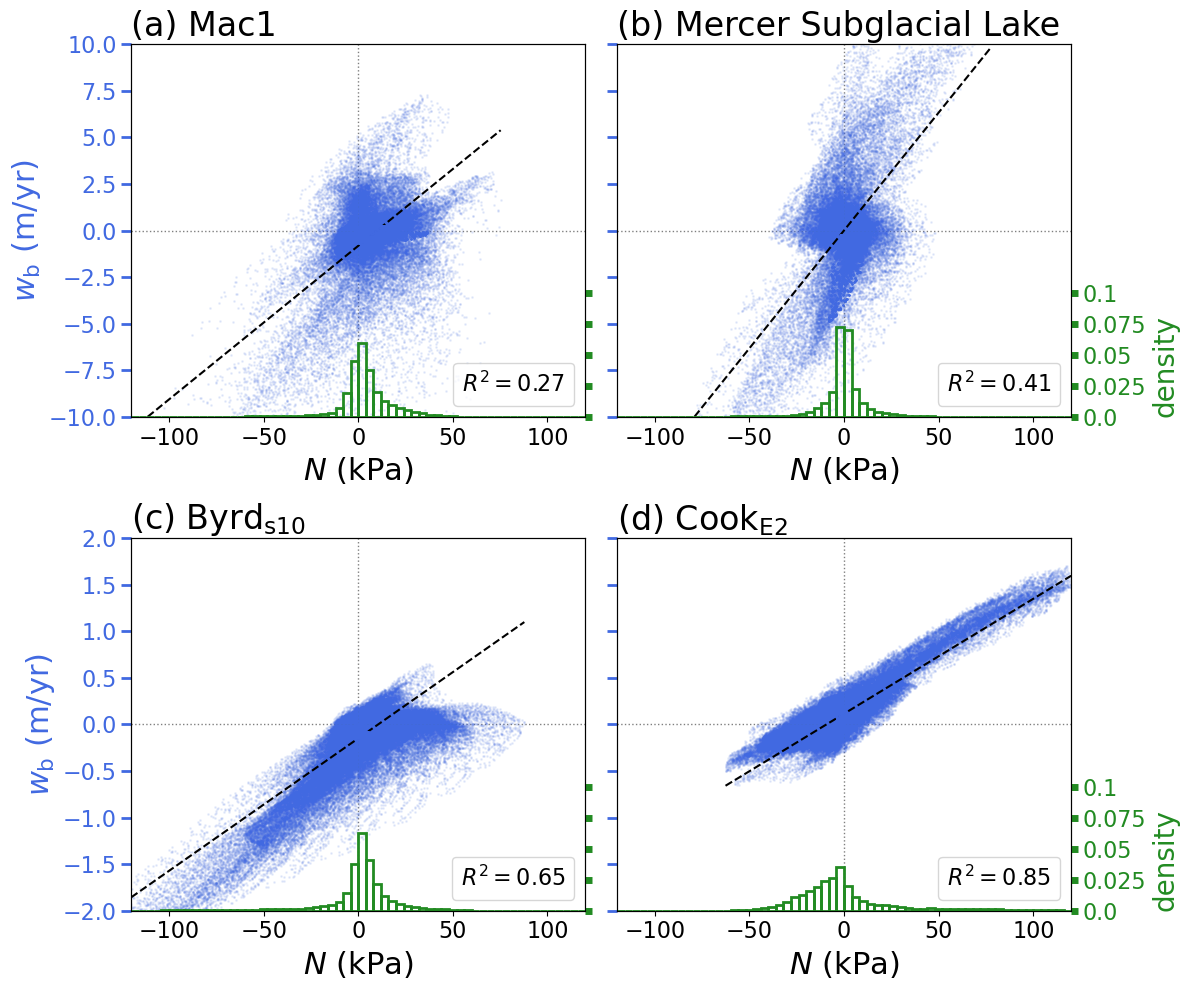

In [5]:
l = 0
j0 = 0
fig = plt.figure(figsize=(12,10))
N__ = [0,0,0,0]
w__ = [0,0,0,0]
for lake_name in lake_names:
    plt.subplot(2,2,l+1)
    plt.title(alphab[l]+r' '+latex_names[l],fontsize=24,loc='left')

    plt.axhline(y=0,linestyle=':',color='k',linewidth=1,alpha=0.5)
    plt.axvline(x=0,linestyle=':',color='k',linewidth=1,alpha=0.5)

    dir_name = '../results/IS2_N_'+lake_name
    N = np.load(dir_name+'/N.npy')
    w = np.load(dir_name+'/w.npy')

    N_mean = np.load(dir_name+'/N_mean.npy')
    w_mean = np.load(dir_name+'/w_mean.npy')
    bdry = np.load(dir_name+'/bdry.npy')

    data_dir = '../data/data_'+lake_name
    x_d = np.load(data_dir+'/x_d.npy')
    y_d = np.load(data_dir+'/y_d.npy')

    t0 = np.load(data_dir+'/t.npy')
    x0 = np.load(data_dir+'/x.npy')
    y0 = np.load(data_dir+'/y.npy')
    t,y,x = np.meshgrid(t0,y0,x0,indexing='ij')
  
    N_sc = 917*9.81
    N_data = np.array([])
    w_data = np.array([])


    for i in np.arange(j0,t0.size,1): 
        plt.plot(N[i,:,:][bdry>1e-2].flatten()*N_sc/1e3,w[i,:,:][bdry>1e-2].flatten(),'o',color=colors[l],markersize=1,alpha=0.1)
        N_data = np.append(N_data,N[i,:,:][bdry>1e-2].flatten()*N_sc/1e3)
        w_data = np.append(w_data,w[i,:,:][bdry>1e-2].flatten())

    w_data = w_data[np.argsort(N_data)]
    N_data = np.sort(N_data)
    N__[l] = N_data
    w__[l] = w_data

    res = linregress(N_data, w_data)
    


    plt.plot(N_data, res.intercept + res.slope*N_data, 'k--',label=r'$R^2=$'+'{:.2f}'.format(res.rvalue**2))
    # plt.plot(N_mean[j0:None].flatten()*N_sc/1e3,w_mean[j0:None].flatten(),'ko',markersize=3,alpha=1)
    plt.plot(N[i,:,:][bdry>1e-2].flatten()*N_sc/1e3,w[i,:,:][bdry>1e-2].flatten(),'o',color=colors[l],markersize=1,alpha=1)
    leg = plt.legend(fontsize=16,loc='lower right',handlelength=0, handletextpad=0, fancybox=True)
    for item in leg.legend_handles:
        item.set_visible(False)
   

    if l==0 or l==1:
        plt.ylim(-10,10)
        plt.xlim(-120,120)
    else:
        plt.ylim(-2,2)
        plt.xlim(-120,120)

    if l ==0 or l==2:
        plt.xlabel(r'$N$ (kPa)',fontsize=22)
        plt.ylabel(r'$w_\mathrm{b}$ (m/yr)',fontsize=22,color='royalblue')
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
    else:
        plt.xlabel(r'$N$ (kPa)',fontsize=22)
        plt.xticks(fontsize=16)
        # plt.yticks(fontsize=16)
        plt.gca().yaxis.set_ticklabels([])

    plt.gca().tick_params(axis='y', colors='royalblue',width=2,length=7)

    ax2 = plt.gca().twinx() 
    bins = np.linspace(-1,1,61)*120
    ax2.hist(N_data,bins=bins,density=True,color='k',alpha=1,linewidth=2,facecolor="None",ec='forestgreen')
  
    ax2.set_ylim(0,0.3)
    ax2.set_xlim(-120,120)
    ax2.set_yticks(np.arange(0,0.125,0.025))
    ax2.yaxis.set_ticklabels([])

    ax2.tick_params(axis='y', colors='forestgreen',width=5,length=5)
    if l==1 or l==3:
        ax2.set_ylabel('density',fontsize=20,color='forestgreen',loc="bottom")
        ax2.yaxis.set_ticklabels(np.round(np.arange(0,0.125,0.025),3),fontsize=16)

    l+=1

plt.tight_layout()
plt.savefig('fig11')
plt.show()
plt.close()